4 - Maximum Likelihood

CTR = click through rate or conversion rate
Not a Gaussina distribution!
only 2 possible outcomes - Bernoulli distribution

cross-entropy cost function in logistic regression is log of Bernoulli likelihood



Problem setup:
    
H = click, T = No click, H+T = total; H and T are independent and identically distributed 

p(H) = p so p(T) = 1-p

Suppose we flip 2H and 3T 

What is the total likelihood??

p(2H) = p * p

P(3T) = (1-p)*(1-p)*(1-p)


L(2H, 3T) = p^2 * (1-p)^3

General form:

L(NH, NT) = p^(NH) * (1-p)^(NT)

What's the maximum likelihood estimate of p? 

Log-likelihood

L = log (L(NH, NT)) = log ( p^(NH) * (1-p)^(NT) ) = NH logp + NT log(1-p)

dL/dp = NH/p - NT/(1-p)  

dL/dp = 0 -> NH/p - NT/(1-p) = 0 

p = NH / (NH + NT)



In [1]:
#
#  Confidence Intervals - Non-Bayesian (Frequentist method)
#

Uncertainty of measurement of parameters 

In [2]:
# Sum of random variables

The mean of gaussian and bernulli distributions is a sum of a random variables:

$ \hat{\mu} = \frac{1}{N} \sum_{i=1}^{N} x_{i}$

mu hat is an estimate of mu

Sum of random variables is also random

$ \hat{\mu} = N(\mu, \sigma^{2}/N)$   

 Central Limit theorem states that sum of random variables tends to a Gaussian distribution

In [3]:
#
#  More N , variance decreases (sigma goes down)!
#

In [4]:
#
# Confidence Intervals
#

In [5]:
import random
import numpy as np

In [6]:
x = np.linspace(-5, 5, 5000)

mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

In [7]:
import matplotlib.pyplot as plt

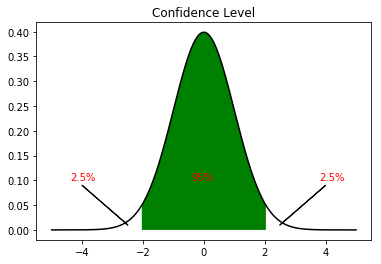

In [8]:
plt.plot(x,y,color='black')

y2 = np.ma.masked_less(y, 0.05)

plt.fill_between(x, y2, facecolor='green', interpolate=True)


plt.text(-4.4, 0.1, '2.5%', color='r')
plt.text(3.8, 0.1, '2.5%', color='r')

plt.text(-0.4, 0.1, '95%', color='r')


plt.arrow(-4,0.09, 1.5,-0.08, head_width=0.001, head_length=0.01, fc='k', ec='k')
plt.arrow(4,0.09, -1.5,-0.08, head_width=0.001, head_length=0.01, fc='k', ec='k')

plt.title('Confidence Level')

plt.show()

We call the confidence level (1 - alpha)

We call the significance level alpha


In [9]:
#
# Confidence interval limits 
#

We want to find limits such that area under the Gaussian is 0.95

$0.95 = 1 - \alpha = \int_{x_{left}}^{x_{right}} N(x, \sigma^{2}/N) dx  $

In [10]:
#
# CDF = Cumulative Distribution Function 
#

$ CDF = P(X<=x) = \int_{-\infty}^{x} p(x) dx $

In [11]:
#
# Inverse CDF 
#

In [12]:
from scipy.stats import norm
print(norm.ppf(0.975))

1.959963984540054


In [13]:
#
# ppf = percent point function (inverse CDF)
#

In [14]:
print(norm.ppf(0.025))

-1.9599639845400545


In [15]:
#
# Confidence Interval
#

$ [\hat{\mu} + z_{left} (\sigma/\sqrt{N}) , \hat{\mu} + z_{right} (\sigma/\sqrt{N}) ] $

where

$ z = \frac{( x - \mu) }{ (\sigma / \sqrt{N})} $

So we have a confidence level interval

Awesome

but what is the problem with this range?

We need to know sigma 

If we don't know sigma, we can use estimated sigma instead - sqrt of maximum likelihood estimate of the variance

$ \hat{\sigma} = \sqrt{ \frac{1}{N}  \sum_{i=1}^{N} (x_{i}-\hat{\mu})^{2} } $

We can use exactly the same formula

$ [\hat{\mu} + z_{left} (\sigma/\sqrt{N}) , \hat{\mu} + z_{right} (\sigma/\sqrt{N}) ] $

for Gaussian and Bernulli distributions
For Bernulli we just replace the Gaussian symbols with Bernulli symbols

var(X) = p(1-p)

$ [\hat{p} + z_{left} (\sqrt{\frac{\hat{p}(1-\hat{p})}{N}}) , \hat{p} + z_{right} (\sqrt{\frac{\hat{p}(1-\hat{p})}{N}}) ] $